In [1]:
# Importing libraries
import sys
import matplotlib.pyplot as plt 
from  matplotlib.ticker import FuncFormatter
import numpy as np 
import pandas as pd
import pathlib
import warnings
import glob
import seaborn as sns
import zipfile
import shutil
import scipy.stats as stats

In [2]:
current_dir = pathlib.Path().absolute()
print(current_dir)
analyses_dir = current_dir.joinpath('analyses')
dataframes_dir = current_dir.joinpath('analyses','dataframes')

/home/luisub/Desktop/FISH_Processing/notebooks_Huy


In [3]:
# Loading dataframes

dataframe_wo_ts350 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_woStim___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_350','dataframe_MS2-CY5_Cyto543_560_woStim.csv') )
dataframe_wo_ts500 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_woStim___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_500','dataframe_MS2-CY5_Cyto543_560_woStim.csv') )

dataframe_18m_ts350 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_18minTPL_5uM___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_350','dataframe_MS2-CY5_Cyto543_560_18minTPL_5uM.csv') )
dataframe_18m_ts500 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_18minTPL_5uM___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_500','dataframe_MS2-CY5_Cyto543_560_18minTPL_5uM.csv') )

dataframe_5h_ts350 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_5hTPL_5uM___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_350','dataframe_MS2-CY5_Cyto543_560_5hTPL_5uM.csv') )
dataframe_5h_ts500 = pd.read_csv(analyses_dir.joinpath('analysis_MS2-CY5_Cyto543_560_5hTPL_5uM___nuc_90__cyto_170__psfz_350__psfyx_120__cs_2__ts_500','dataframe_MS2-CY5_Cyto543_560_5hTPL_5uM.csv') )


In [4]:
dataframe_wo_ts350

,Unnamed: 0,image_id,cell_id,spot_id,nucleus_y,nucleus_x,nuc_area_px,cyto_area_px,cell_area_px,z,y,x,is_nuc,is_cluster,cluster_size,spot_type,is_cell_fragmented
0,0,0,0,0,162,465,7780,23526,7780,3,136,465,1,1,2,0,0
1,1,0,0,1,162,465,7780,23526,7780,4,156,432,1,1,3,0,0
2,2,0,0,2,162,465,7780,23526,7780,4,162,465,1,1,2,0,0
3,3,0,0,3,162,465,7780,23526,7780,4,186,469,1,1,2,0,0
4,4,0,0,4,162,465,7780,23526,7780,4,192,480,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47387,47387,11,142,166,844,287,8909,14316,8909,17,857,267,1,0,0,1,0
47388,47388,11,142,167,844,287,8909,14316,8909,16,862,264,1,0,0,1,0
47389,47389,11,142,168,844,287,8909,14316,8909,16,867,242,1,0,0,1,0
47390,47390,11,142,169,844,287,8909,14316,8909,17,866,252,1,0,0,1,0


In [5]:
def extracting_data_from_df (df,spot_type_selected=0):
    # Extracting data from data frame
    minimum_spots_cluster = 5
    number_cells = df['cell_id'].nunique()
    # Number of spots
    number_of_spots_per_cell = [len( df.loc[  (df['cell_id']==i)  & (df['spot_type']==spot_type_selected) & (df['is_cell_fragmented']!=-1)  ].spot_id) for i in range(0, number_cells)]
    # Number of spots in cytosol
    number_of_spots_per_cell_cytosol = [len( df.loc[  (df['cell_id']==i) & (df['is_nuc']==False) & (df['spot_type']==spot_type_selected) & (df['is_cell_fragmented']!=-1) ].spot_id) for i in range(0, number_cells)]
    # Number of spots in nucleus
    number_of_spots_per_cell_nucleus = [len( df.loc[  (df['cell_id']==i) &  (df['is_cluster']==False) & (df['is_nuc']==True) & (df['spot_type']==spot_type_selected)  & (df['is_cell_fragmented']!=-1)   ].spot_id) for i in range(0, number_cells)]
    
    
    # Number of TS per cell.
    number_of_TS_per_cell = [len( df.loc[  (df['cell_id']==i) &  (df['is_cluster']==True) & (df['is_nuc']==True) & (df['spot_type']==spot_type_selected) & (df['cluster_size'] >=minimum_spots_cluster) & (df['is_cell_fragmented']!=-1) ].spot_id) for i in range(0, number_cells)]    
    
    # Number of RNA in a TS
    #ts_size =  df.loc[   (df['is_cluster']==True) & (df['is_nuc']==True)  & (df['spot_type']==spot_type_selected) & (df['is_cell_fragmented']!=-1)  ].cluster_size.values
    
    # Size of each cell
    cell_size = [df.loc[df['cell_id']==i].cell_area_px.values[0] for i in range(0, number_cells)]
    cell_ID  = np.sort(np.unique(df['cell_id'].values))
    return cell_ID ,number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus , number_of_TS_per_cell

In [6]:
#dataframe_wo_ts350.head()

In [7]:
def combining_dataframes(df_condition1, df_condition2):
    
    ##### First condition using a threshold of 350  #####
    # Extracting data from CH1- spot_type_selected=0
    cell_ID ,rna_cytosol_ch1_ts350, rna_nucleus_ch1_ts350, ts_ch1_ts350  = extracting_data_from_df (df=df_condition1,spot_type_selected=0)
    # Extracting data from CH3- spot_type_selected=1
    cell_ID ,rna_cytosol_ch3_ts350, rna_nucleus_ch3_ts350, ts_ch3_ts350  = extracting_data_from_df (df=df_condition1,spot_type_selected=1)

    ##### First condition using a threshold of 500  #####
    # Extracting data from CH1- spot_type_selected=0
    cell_ID ,rna_cytosol_ch1_ts500, rna_nucleus_ch1_ts500, ts_ch1_ts500 = extracting_data_from_df (df=df_condition2,spot_type_selected=0)
    # Extracting data from CH3- spot_type_selected=1
    cell_ID ,rna_cytosol_ch3_ts500, rna_nucleus_ch3_ts500, ts_ch3_ts500 = extracting_data_from_df (df=df_condition2,spot_type_selected=1)

    array_data = np.column_stack([cell_ID,  rna_nucleus_ch1_ts350, rna_cytosol_ch1_ts350, ts_ch1_ts350, rna_nucleus_ch3_ts350, rna_cytosol_ch3_ts350, ts_ch3_ts350,
                                            rna_nucleus_ch1_ts500, rna_cytosol_ch1_ts500, ts_ch1_ts500, rna_nucleus_ch3_ts500, rna_cytosol_ch3_ts500, ts_ch3_ts500 ])

    # final data frame with format for the model
    df_for_model = pd.DataFrame(data=array_data, columns =['cell_ID',   'RNA_nuc_ch1_ts350','RNA_cyto_ch1_ts350','ts_ch1_ts350','RNA_nuc_ch3_ts350','RNA_cyto_ch3_ts350', 'ts_ch3_ts350',
                                                                        'RNA_nuc_ch1_ts500','RNA_cyto_ch1_ts500','ts_ch1_ts500','RNA_nuc_ch3_ts500','RNA_cyto_ch3_ts500', 'ts_ch3_ts500'] )

    return df_for_model


In [8]:
df_for_model_wo  = combining_dataframes(df_condition1 = dataframe_wo_ts350 , df_condition2 = dataframe_wo_ts500)
df_for_model_18m  = combining_dataframes(df_condition1 = dataframe_18m_ts350 , df_condition2 = dataframe_18m_ts500)
df_for_model_5h  = combining_dataframes(df_condition1 = dataframe_5h_ts350 , df_condition2 = dataframe_5h_ts500)

# saving as csv

df_for_model_wo.to_csv(path_or_buf=dataframes_dir.joinpath('df_for_model_wo_stim.csv'))
df_for_model_18m.to_csv(path_or_buf=dataframes_dir.joinpath('df_for_model_18m.csv'))
df_for_model_5h.to_csv(path_or_buf=dataframes_dir.joinpath('df_for_model_5h.csv'))



In [9]:
def plot_scatter_spots_cell_size(x,y,plot_title='test',destination_folder=None,selected_color = '#1C00FE'):
    r, p = stats.pearsonr(x, y)
    df_join_distribution = pd.DataFrame({'Ch1':x,'Ch3':y})
    plt.figure(figsize=(6,5))
    sns.set(font_scale = 1.3)
    ax = sns.jointplot(data=df_join_distribution, y='Ch3', x='Ch1', color= selected_color , marginal_kws=dict(bins=40))
    ax.plot_joint(sns.rugplot, height=0, color=[0.7,0.7,0.7], clip_on=True)
    ax.plot_joint(sns.kdeplot, color=[0.5,0.5,0.5], levels=5)
    ax.plot_joint(sns.regplot,scatter_kws={'color': 'orangered',"s":10, 'marker':'o'}, line_kws={'color': selected_color,'lw': 2} )
    blank_plot, = ax.ax_joint.plot([], [], linestyle="", alpha=0)
    ax.ax_joint.legend([blank_plot],['r={:.2f}'.format( np.round(r,2))],loc='upper left',)
    ax.ax_joint.set_xlim(-1, np.percentile(x,100))
    ax.ax_joint.set_ylim(-1, np.percentile(y,100))
    ax.fig.suptitle(plot_title)
    ax.ax_joint.collections[0].set_alpha(0)
    ax.fig.tight_layout()
    ax.fig.subplots_adjust(top=0.92) 
    name_plot = plot_title +'.pdf'  
    #plt.savefig(name_plot, transparent=False,dpi=1200, bbox_inches = 'tight', format='png')
    #fig = blank_plot.get_figure()
    plt.show()
    #pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))
    return 

In [10]:
def plotting_scatters(df_for_model, main_title=''):
    x = df_for_model.RNA_nuc_ch1_ts350.values
    y = df_for_model.RNA_nuc_ch3_ts350.values
    title= main_title+ ' RNA nuc (th 350)'
    plot_scatter_spots_cell_size(x,y,plot_title=title)

    x = df_for_model.RNA_nuc_ch1_ts500.values
    y = df_for_model.RNA_nuc_ch3_ts500.values
    title= main_title+ ' RNA nuc (th 500)'
    plot_scatter_spots_cell_size(x,y,plot_title=title)

    x = df_for_model.ts_ch1_ts350.values
    y = df_for_model.ts_ch3_ts350.values
    title= main_title+ ' trans. sites (th 350)'
    plot_scatter_spots_cell_size(x,y,plot_title=title)

    x = df_for_model.ts_ch1_ts500.values
    y = df_for_model.ts_ch3_ts500.values
    title= main_title+ ' trans. sites (th 500)'
    plot_scatter_spots_cell_size(x,y,plot_title=title)


<Figure size 432x360 with 0 Axes>

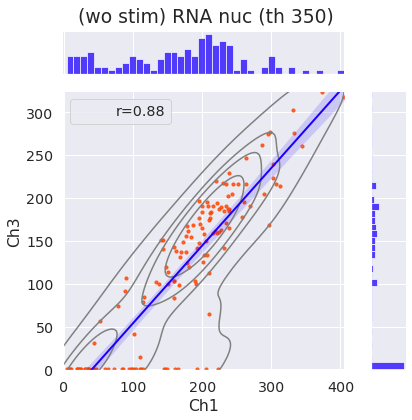

<Figure size 432x360 with 0 Axes>

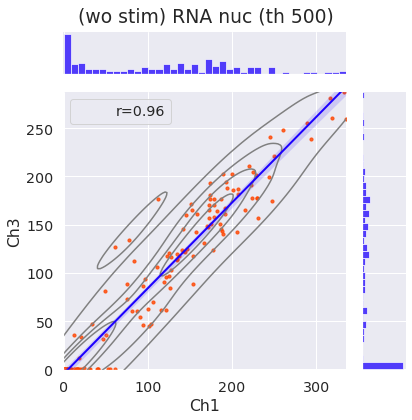

<Figure size 432x360 with 0 Axes>

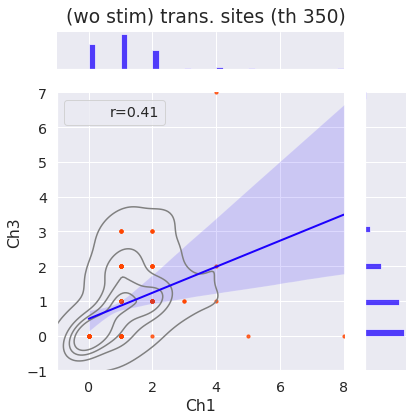

<Figure size 432x360 with 0 Axes>

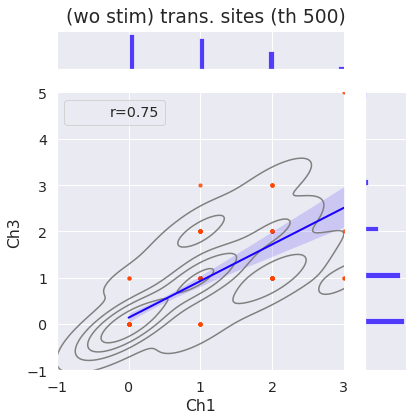

In [11]:
plotting_scatters(df_for_model = df_for_model_wo,main_title='(wo stim)')

<Figure size 432x360 with 0 Axes>

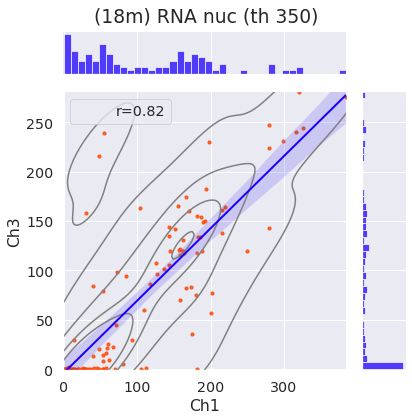

<Figure size 432x360 with 0 Axes>

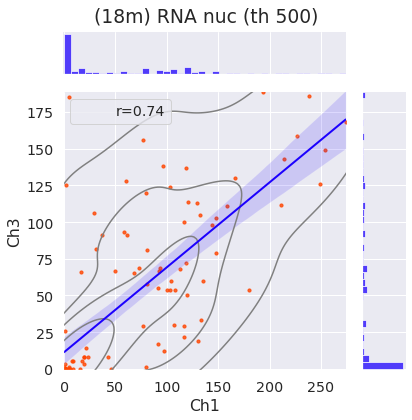

<Figure size 432x360 with 0 Axes>

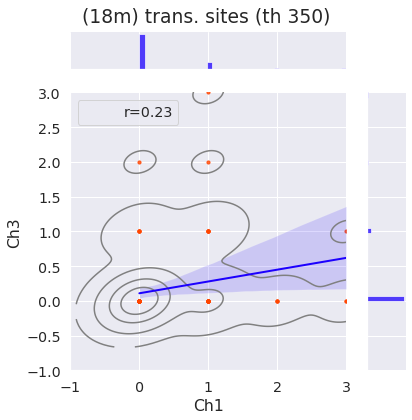

<Figure size 432x360 with 0 Axes>

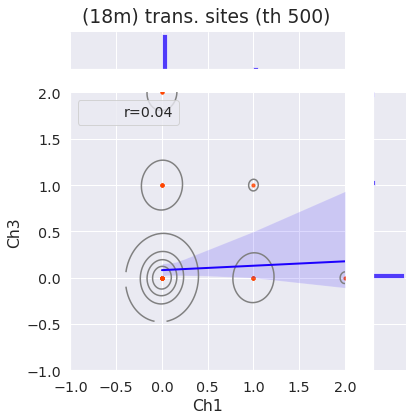

In [12]:
plotting_scatters(df_for_model = df_for_model_18m,main_title='(18m)') 

<Figure size 432x360 with 0 Axes>

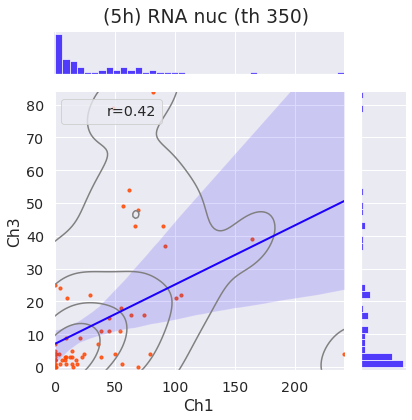

<Figure size 432x360 with 0 Axes>

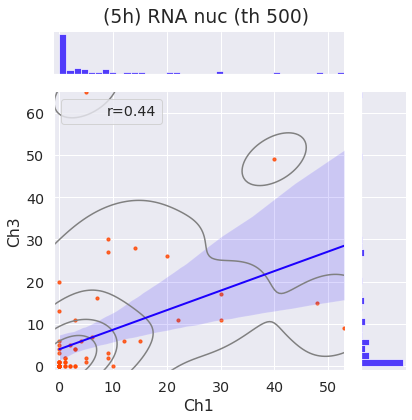

<Figure size 432x360 with 0 Axes>

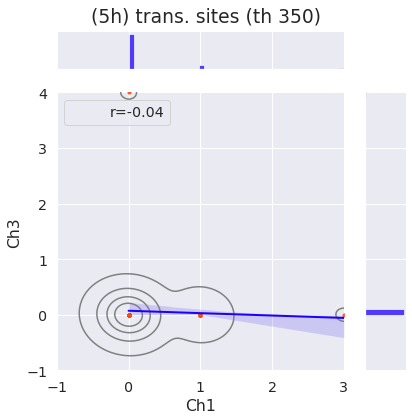

<Figure size 432x360 with 0 Axes>

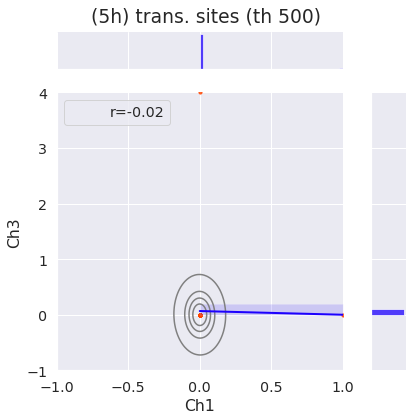

In [13]:
plotting_scatters(df_for_model = df_for_model_5h,main_title='(5h)')  